In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np

In [4]:
rating = pd.read_csv('/content/drive/MyDrive/2023-2 EDA/드라마_시청률_데이터.csv')
metadata = pd.read_csv('/content/drive/MyDrive/2023-2 EDA/미니시리즈 전처리1.csv')
actors_quality = pd.read_csv('/content/drive/MyDrive/2023-2 EDA/배우브랜드.csv')

In [5]:
mean_rating = pd.DataFrame(rating.groupby('작품명')['시청률'].mean())
mean_rating

,시청률
작품명,
(아는 건 별로 없지만) 가족입니다,4.177688
17세의 조건,2.850000
18 어게인,2.724813
365: 운명을 거스르는 1년,4.329167
"60일, 지정생존자",4.464313
...,...
화양연화,4.274312
환혼,6.676150
환혼 빛과 그림자,7.838500


In [6]:
metadata

,작품명,방송 채널,방송 횟수,출연자,시작일,종료일,요일,"금, 월","금, 토","수, 목",...,최강희,최시원,최우식,최원영,최진혁,한석규,한예리,한지민,한채영,황정음
0,최고의 치킨,"iHQ DRAMA, MBN",12.0,"['박선호', ' 김소혜', ' 주우재 ']",2019-01-02,2019-02-07,"수, 목",0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,동네변호사 조들호 2: 죄와 벌,KBS 2TV,40.0,"['박신양', ' 고현정', ' 이민지', ' 변희봉 ']",2019-01-07,2019-03-26,"월, 화",0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,왜그래 풍상씨,KBS 2TV,40.0,"['유준상', ' 오지호', ' 전혜빈', ' 이시영', ' 이창엽 ']",2019-01-09,2019-03-14,"수, 목",0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,봄이 오나 봄,MBC TV,32.0,"['이유리', ' 엄지원', ' 이종혁', ' 최병모 ']",2019-01-23,2019-03-21,"수, 목",0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,진심이 닿다,tvN,16.0,"['유인나', ' 이동욱', ' 이상우', ' 손성윤 ']",2019-02-06,2019-03-28,"수, 목",0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,나쁜 엄마,JTBC,14.0,"['라미란', ' 이도현', ' 안은진', ' 유인수 ']",2023-04-26,2023-06-08,"수, 목",0,0,1,...,0,0,0,0,0,0,0,0,0,0
171,"어쩌다 마주친, 그대",KBS 2TV,16.0,"['김동욱', ' 진기주', ' 서지혜 ']",2023-05-01,2023-06-20,"월, 화",0,0,0,...,0,0,0,0,0,0,0,0,0,0
172,행복배틀,ENA,16.0,"['이엘', ' 진서연', ' 차예련', ' 박효주', ' 우정원 ']",2023-05-31,2023-07-20,"수, 목",0,0,1,...,0,0,0,0,0,0,0,0,0,0
173,가슴이 뛴다,KBS 2TV,16.0,"['옥택연', ' 원지안', ' 박강현', ' 윤소희 ']",2023-06-26,2023-08-15,"월, 화",0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
Data = pd.merge(metadata,mean_rating,on = "작품명")
Data = Data.drop(['출연자','요일'],axis=1)
Data

,작품명,방송 채널,방송 횟수,시작일,종료일,"금, 월","금, 토","수, 목","월, 화",일,...,최시원,최우식,최원영,최진혁,한석규,한예리,한지민,한채영,황정음,시청률
0,동네변호사 조들호 2: 죄와 벌,KBS 2TV,40.0,2019-01-07,2019-03-26,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,5.830000
1,왜그래 풍상씨,KBS 2TV,40.0,2019-01-09,2019-03-14,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,12.187500
2,봄이 오나 봄,MBC TV,32.0,2019-01-23,2019-03-21,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2.506250
3,진심이 닿다,tvN,16.0,2019-02-06,2019-03-28,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3.969375
4,아이템,MBC TV,32.0,2019-02-11,2019-04-02,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3.706250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,조선 정신과 의사 유세풍 2,tvN,10.0,2023-01-11,2023-02-09,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2.595100
128,성스러운 아이돌,tvN,12.0,2023-02-15,2023-03-23,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1.832417
129,보라! 데보라,ENA,14.0,2023-04-12,2023-05-25,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.881071
130,나쁜 엄마,JTBC,14.0,2023-04-26,2023-06-08,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,8.158714


In [8]:
Data = Data.sort_values(by = '시청률').reset_index(drop = True)
Data

,작품명,방송 채널,방송 횟수,시작일,종료일,"금, 월","금, 토","수, 목","월, 화",일,...,최시원,최우식,최원영,최진혁,한석규,한예리,한지민,한채영,황정음,시청률
0,보라! 데보라,ENA,14.0,2023-04-12,2023-05-25,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.881071
1,달리는 조사관,OCN,14.0,2019-09-18,2019-10-31,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.912000
2,스폰서,"MBN, IHQ DRAMA",12.0,2022-02-23,2022-04-06,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0.997333
3,사장님을 잠금해제,ENA,12.0,2022-12-07,2023-01-12,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1.188500
4,너에게 가는 속도 493KM,KBS 2TV,16.0,2022-04-20,2022-06-09,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1.387500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,왜그래 풍상씨,KBS 2TV,40.0,2019-01-09,2019-03-14,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,12.187500
128,닥터 프리즈너,KBS 2TV,32.0,2019-03-20,2019-05-15,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,13.231250
129,동백꽃 필 무렵,KBS 2TV,40.0,2019-09-18,2019-11-21,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,13.860000
130,펜트하우스,SBS,21.0,2020-10-26,2021-01-05,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,16.388636


In [9]:
Data.columns

Index(['작품명', '방송 채널', '방송 횟수', '시작일', '종료일', '금, 월', '금, 토', '수, 목', '월, 화',
       '일',
       ...
       '최시원', '최우식', '최원영', '최진혁', '한석규', '한예리', '한지민', '한채영', '황정음', '시청률'],
      dtype='object', length=680)

# 황금 시간대가 있을까?


In [10]:
Data_time = Data[['작품명','시작 시간','금, 월','금, 토','수, 목','월, 화','일','시청률']]
Data_time

,작품명,시작 시간,"금, 월","금, 토","수, 목","월, 화",일,시청률
0,보라! 데보라,9:00,0,0,1,0,0,0.881071
1,달리는 조사관,11:00,0,0,1,0,0,0.912000
2,스폰서,11:00,0,0,1,0,0,0.997333
3,사장님을 잠금해제,9:00,0,0,1,0,0,1.188500
4,너에게 가는 속도 493KM,9:50,0,0,1,0,0,1.387500
...,...,...,...,...,...,...,...,...
127,왜그래 풍상씨,10:00,0,0,1,0,0,12.187500
128,닥터 프리즈너,10:00,0,0,1,0,0,13.231250
129,동백꽃 필 무렵,10:00,0,0,1,0,0,13.860000
130,펜트하우스,10:00,0,0,0,1,0,16.388636


In [11]:
Data_time['시작 시간'].unique()
#8:50~11:00

array(['9:00', '11:00', '9:50', '9:30', '10:30', '22:30', '10:35',
       '10:50', '10:00', '9:20', '8:55', '9:35', '10:40', '8:50', '9:45',
       '9:25', '10:31', '9:40'], dtype=object)

In [12]:
time1 = Data_time[(Data_time['시작 시간']=='8:50')|(Data_time['시작 시간']=="9:00")|(Data_time['시작 시간']=='9:20')|(Data_time['시작 시간']=='9:25')|(Data_time['시작 시간']=='8:55')]
time1

,작품명,시작 시간,"금, 월","금, 토","수, 목","월, 화",일,시청률
0,보라! 데보라,9:00,0,0,1,0,0,0.881071
3,사장님을 잠금해제,9:00,0,0,1,0,0,1.188500
5,반의 반,9:00,0,0,0,1,0,1.404833
9,선배 그 립스틱 바르지 마요,9:00,0,0,0,1,0,1.845938
22,너는 나의 봄,9:00,0,0,0,1,0,2.301563
28,나를 사랑한 스파이,9:20,0,0,1,0,0,2.553125
31,하자있는 인간들,8:55,0,0,1,0,0,2.643750
42,런 온,9:00,0,0,1,0,0,2.998312
45,어느 날 우리집 현관으로 멸망이 들어왔다,9:00,0,0,0,1,0,3.027438
48,어쩌다 발견한 하루,8:55,0,0,1,0,0,3.221875


In [13]:
time2 = Data_time[(Data_time['시작 시간']=='9:35')|(Data_time['시작 시간']=="9:45")|(Data_time['시작 시간']=='9:40')|(Data_time['시작 시간']=='9:50')|(Data_time['시작 시간']=='9:30')]
time2

,작품명,시작 시간,"금, 월","금, 토","수, 목","월, 화",일,시청률
4,너에게 가는 속도 493KM,9:50,0,0,1,0,0,1.387500
6,으라차차 와이키키 2,9:30,0,0,0,1,0,1.557562
12,"우리, 사랑했을까",9:30,0,0,1,0,0,1.921812
13,악마가 너의 이름을 부를 때,9:30,0,0,1,0,0,1.936125
15,머니게임,9:30,0,0,1,0,0,1.965437
19,싸이코패스 다이어리,9:30,0,0,1,0,0,2.150375
20,당신이 소원을 말하면,9:50,0,0,1,0,0,2.287500
21,날씨가 좋으면 찾아가겠어요,9:30,0,0,0,1,0,2.291625
30,위대한 쇼,9:30,0,0,0,1,0,2.598313
32,어비스,9:30,0,0,0,1,0,2.661812


In [14]:
time3 = Data_time[(Data_time['시작 시간']=='10:00')]
time3

,작품명,시작 시간,"금, 월","금, 토","수, 목","월, 화",일,시청률
16,계약우정,10:00,0,0,0,1,0,2.025000
23,본 어게인,10:00,0,0,0,1,0,2.359375
25,절대 그이,10:00,0,0,1,0,0,2.502778
26,봄이 오나 봄,10:00,0,0,1,0,0,2.506250
44,너의 노래를 들려줘,10:00,0,0,0,1,0,3.012500
51,초면에 사랑합니다,10:00,0,0,0,1,0,3.350000
58,우리는 오늘부터,10:00,0,0,0,1,0,3.607143
60,아이템,10:00,0,0,0,1,0,3.706250
64,트롤리,10:00,0,0,0,1,0,3.868750
65,그 해 우리는,10:00,0,0,0,1,0,3.925000


In [15]:
time4 = Data_time[(Data_time['시작 시간']=='10:30')|(Data_time['시작 시간']=="22:30")|(Data_time['시작 시간']=='10:35')|(Data_time['시작 시간']=='10:31')|(Data_time['시작 시간']=='10:40')|(Data_time['시작 시간']=="10:50")|(Data_time['시작 시간']=="11:00")]
time4

,작품명,시작 시간,"금, 월","금, 토","수, 목","월, 화",일,시청률
1,달리는 조사관,11:00,0,0,1,0,0,0.912000
2,스폰서,11:00,0,0,1,0,0,0.997333
7,홈타운,10:30,0,0,1,0,0,1.815667
8,성스러운 아이돌,22:30,0,0,1,0,0,1.832417
10,멘탈코치 제갈길,10:35,0,0,0,1,0,1.864563
11,빙의,11:00,0,0,1,0,0,1.871000
14,오 마이 베이비,10:50,0,0,1,0,0,1.952937
17,"링크:먹고 사랑하라, 죽이게",10:30,0,0,0,1,0,2.108500
18,구해줘 2,11:00,0,0,1,0,0,2.138875
24,멜랑꼴리아,10:30,0,0,1,0,0,2.399437


In [16]:
time1_avg = time1['시청률'].mean()
time1_avg

4.255950176366843

In [17]:
time2_avg = time2['시청률'].mean()
time2_avg

4.619447454887752

In [18]:
time3_avg = time3['시청률'].mean()
time3_avg

6.349063011063011

In [19]:
time4_avg = time4['시청률'].mean()
time4_avg

3.3789538587848935

# 배우의 브랜드파워가 시청률에 끼치는 영향

In [20]:
Data_c = Data.drop(['방송 채널','종료일','시작 시간'],axis=1)
Data_c

,작품명,방송 횟수,시작일,"금, 월","금, 토","수, 목","월, 화",일,"토, 일",SF,...,최시원,최우식,최원영,최진혁,한석규,한예리,한지민,한채영,황정음,시청률
0,보라! 데보라,14.0,2023-04-12,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.881071
1,달리는 조사관,14.0,2019-09-18,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.912000
2,스폰서,12.0,2022-02-23,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.997333
3,사장님을 잠금해제,12.0,2022-12-07,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.188500
4,너에게 가는 속도 493KM,16.0,2022-04-20,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.387500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,왜그래 풍상씨,40.0,2019-01-09,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12.187500
128,닥터 프리즈너,32.0,2019-03-20,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13.231250
129,동백꽃 필 무렵,40.0,2019-09-18,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13.860000
130,펜트하우스,21.0,2020-10-26,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,16.388636


In [21]:
Data_u = Data_c.drop(Data_c.iloc[:, 3:110],axis=1)
Data_u = Data_u.drop([' ','방송 횟수'],axis=1)
Data_u

,작품명,시작일,강기영,강미나,강미나,강민아,강민혁,강별,강성민,강승현,...,최시원,최우식,최원영,최진혁,한석규,한예리,한지민,한채영,황정음,시청률
0,보라! 데보라,2023-04-12,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.881071
1,달리는 조사관,2019-09-18,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.912000
2,스폰서,2022-02-23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.997333
3,사장님을 잠금해제,2022-12-07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.188500
4,너에게 가는 속도 493KM,2022-04-20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.387500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,왜그래 풍상씨,2019-01-09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12.187500
128,닥터 프리즈너,2019-03-20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13.231250
129,동백꽃 필 무렵,2019-09-18,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13.860000
130,펜트하우스,2020-10-26,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16.388636


In [22]:
Data_g = Data_u.tail(26)
Data_b = Data_u.head(26)

## Data_g(시청률 상위 20%)의 브랜드평판지수의 합

In [23]:
Data_g['시작일'] = pd.to_datetime(Data_g['시작일'])

<ipython-input-23-cdb531e4d604>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_g['시작일'] = pd.to_datetime(Data_g['시작일'])


In [24]:
Data_2023 = Data_g[Data_g['시작일'].dt.year == 2023]
Data_2022 = Data_g[Data_g['시작일'].dt.year == 2022]
Data_2021 = Data_g[Data_g['시작일'].dt.year == 2021]
Data_2020 = Data_g[Data_g['시작일'].dt.year == 2020]
Data_2019 = Data_g[Data_g['시작일'].dt.year == 2019]

### 19년도

In [25]:
Data_2019y = Data_2019.drop(['시작일','작품명','시청률'],axis=1)

In [26]:
Data19 = Data_2019y.T
Data19['배우'] = Data19.index

In [27]:
actors_quality_19 = actors_quality[actors_quality['기간'].astype(str).str.contains('19')]
actors_brand19 = pd.DataFrame(actors_quality_19.groupby('브랜드')['브랜드평판지수'].mean())
actors_brand19 = actors_brand19.sort_values(by = '브랜드평판지수')
actors_brand19['배우'] = actors_brand19.index

In [28]:
actors19 = pd.merge(Data19,actors_brand19,on="배우")
actors19.index = actors19['배우']
actors19 = actors19.drop('배우',axis=1)

In [29]:
actors_19 = actors19.drop('브랜드평판지수',axis=1)
actors_19 = actors_19[(actors_19 != 0).any(axis=1)]
#actors_19['배우'] = actors_19.index
actors_19

,107,110,111,112,121,124,127,128,129
배우,,,,,,,,,
공효진,0,0,0,0,0,0,0,0,1
신혜선,0,0,0,1,0,0,0,0,0
유준상,0,0,0,0,0,0,1,0,0
장나라,0,0,0,0,0,1,0,0,0
정재영,0,0,1,0,0,0,0,0,0
조여정,0,0,0,0,1,0,0,0,0


In [30]:
w_brandpower19 = pd.merge(actors_19,actors_brand19,on="배우")['브랜드평판지수'].sum()
w_brandpower19

24234795.0

### 22년도

In [31]:
Data_2022y = Data_2022.drop(['시작일','작품명','시청률'],axis=1)

In [32]:
Data22 = Data_2022y.T
Data22['배우'] = Data22.index

In [33]:
actors_quality_22 = actors_quality[actors_quality['기간'].astype(str).str.contains('22')]
actors_brand22 = pd.DataFrame(actors_quality_22.groupby('브랜드')['브랜드평판지수'].mean())
actors_brand22 = actors_brand22.sort_values(by = '브랜드평판지수')
actors_brand22['배우'] = actors_brand22.index

In [34]:
actors22 = pd.merge(Data22,actors_brand22,on="배우")
actors22.index = actors22['배우']
actors22 = actors22.drop('배우',axis=1)

In [35]:
actors_22 = actors22.drop('브랜드평판지수',axis=1)
actors_22 = actors_22[(actors_22 != 0).any(axis=1)]
#actors_22['배우'] = actors_22.index
actors_22

,106,109,116,123,125
배우,,,,,
박은빈,0,0,0,0,1
손예진,1,0,0,0,0
안보현,0,0,1,0,0
이준,0,1,0,0,0


In [36]:
w_brandpower22 = pd.merge(actors_22,actors_brand22,on="배우")['브랜드평판지수'].sum()
w_brandpower22

21494415.333333332

## Data_b(시청률 하위 20%)의 브랜드평판지수의 합

In [37]:
Data_b['시작일'] = pd.to_datetime(Data_b['시작일'])

<ipython-input-37-82c659eeea3d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_b['시작일'] = pd.to_datetime(Data_b['시작일'])


In [38]:
Data_2023 = Data_b[Data_b['시작일'].dt.year == 2023]
Data_2022 = Data_b[Data_b['시작일'].dt.year == 2022]
Data_2021 = Data_b[Data_b['시작일'].dt.year == 2021]
Data_2020 = Data_b[Data_b['시작일'].dt.year == 2020]
Data_2019 = Data_b[Data_b['시작일'].dt.year == 2019]

### 19년도

In [39]:
Data_2019y = Data_2019.drop(['시작일','작품명','시청률'],axis=1)

In [40]:
Data19 = Data_2019y.T
Data19['배우'] = Data19.index

In [41]:
actors_quality_19 = actors_quality[actors_quality['기간'].astype(str).str.contains('19')]
actors_brand19 = pd.DataFrame(actors_quality_19.groupby('브랜드')['브랜드평판지수'].mean())
actors_brand19 = actors_brand19.sort_values(by = '브랜드평판지수')
actors_brand19['배우'] = actors_brand19.index

In [42]:
actors19 = pd.merge(Data19,actors_brand19,on="배우")
actors19.index = actors19['배우']
actors19 = actors19.drop('배우',axis=1)

In [43]:
actors_19 = actors19.drop('브랜드평판지수',axis=1)
actors_19 = actors_19[(actors_19 != 0).any(axis=1)]
#actors_19['배우'] = actors_19.index
actors_19

,1,6,11,13,18,19,25
배우,,,,,,,
김선호,0,1,0,0,0,0,0
여진구,0,0,0,0,0,0,1
윤시윤,0,0,0,0,0,1,0
정경호,0,0,0,1,0,0,0


In [44]:
l_brandpower19 = pd.merge(actors_19,actors_brand19,on="배우")['브랜드평판지수'].sum()
l_brandpower19

12839038.666666668

### 22년도

In [45]:
Data_2022y = Data_2022.drop(['시작일','작품명','시청률'],axis=1)

In [46]:
Data22 = Data_2022y.T
Data22['배우'] = Data22.index

In [47]:
actors_quality_22 = actors_quality[actors_quality['기간'].astype(str).str.contains('22')]
actors_brand22 = pd.DataFrame(actors_quality_22.groupby('브랜드')['브랜드평판지수'].mean())
actors_brand22 = actors_brand22.sort_values(by = '브랜드평판지수')
actors_brand22['배우'] = actors_brand22.index

In [48]:
actors22 = pd.merge(Data22,actors_brand22,on="배우")
actors22.index = actors22['배우']
actors22 = actors22.drop('배우',axis=1)

In [49]:
actors_22 = actors22.drop('브랜드평판지수',axis=1)
actors_22 = actors_22[(actors_22 != 0).any(axis=1)]
#actors_22['배우'] = actors_22.index
actors_22

,2,3,4,10,17,20
배우,,,,,,
박주현,0,0,1,0,0,0
여진구,0,0,0,0,1,0
정우,0,0,0,1,0,0
지창욱,0,0,0,0,0,1
채종협,0,1,0,0,0,0
한채영,1,0,0,0,0,0


In [50]:
l_brandpower22 = pd.merge(actors_22,actors_brand22,on="배우")['브랜드평판지수'].sum()
l_brandpower22

4902828.0

# 시각화

## 황금 시간대

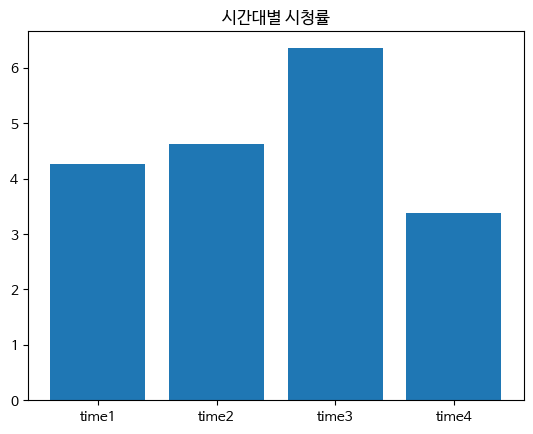

In [51]:
x = np.arange(4)
years = ['time1', 'time2', 'time3', 'time4']
values = [time1_avg, time2_avg, time3_avg, time4_avg]

plt.bar(x, values)
plt.xticks(x, years)
plt.title('시간대별 시청률')
plt.show()

10시에서10:30 사이에 시작하는 드라마를 제일 선호하나, 너무 늦은 시간대인 11시는 시청률이 드라마틱하게 내려감

## 브랜드평판지수

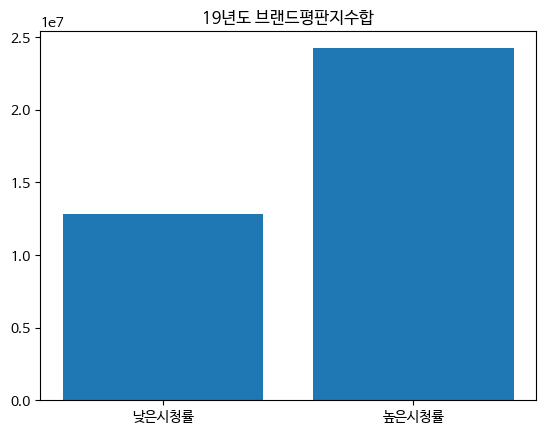

In [52]:
x = np.arange(2)
years = ['낮은시청률','높은시청률']
values = [l_brandpower19,w_brandpower19]

plt.bar(x, values)
plt.xticks(x, years)
plt.title('19년도 브랜드평판지수합')
plt.show()

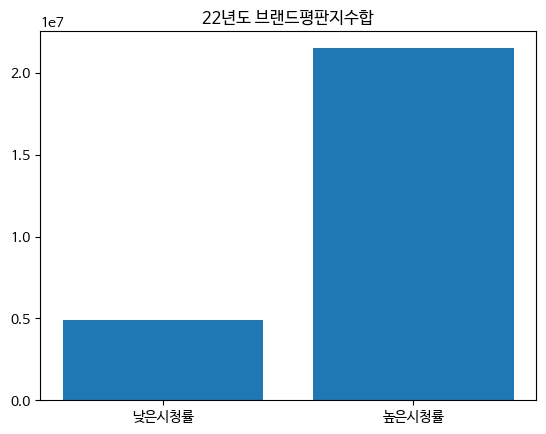

In [53]:
x = np.arange(2)
years = ['낮은시청률','높은시청률']
values = [l_brandpower22,w_brandpower22]

plt.bar(x, values)
plt.xticks(x, years)
plt.title('22년도 브랜드평판지수합')
plt.show()

20년도 21년도 시도해 봐야함

19년도와 20년도를 분석 해 봤을때는, 배우의 브랜드파워가 시청률에 영향을 끼치는 것이 명확해 보임